In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
from datetime import datetime, timedelta
from collections import defaultdict

In [ ]:
# Set the visual style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
from datetime import datetime, timedelta
from collections import defaultdict

# Set the visual style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Define DEX protocols with their properties
dexes = {
    'Uniswap V3': {
        'fee_tiers': [0.0005, 0.003, 0.01],
        'weight': 0.35,
        'efficiency': 0.996,
        'risk_score': 25,
        'volatility': 0.01
    },
    'Curve': {
        'fee_tiers': [0.0004, 0.00045],
        'weight': 0.25,
        'efficiency': 0.997,
        'risk_score': 30,
        'volatility': 0.005
    },
    'Balancer': {
        'fee_tiers': [0.001, 0.002, 0.005],
        'weight': 0.15,
        'efficiency': 0.994,
        'risk_score': 45,
        'volatility': 0.02
    },
    'Sushiswap': {
        'fee_tiers': [0.003],
        'weight': 0.15,
        'efficiency': 0.992,
        'risk_score': 55,
        'volatility': 0.025
    },
    '1inch': {
        'fee_tiers': [0.0015],
        'weight': 0.1,
        'efficiency': 0.993,
        'risk_score': 40,
        'volatility': 0.015
    }
}

# Set some realistic token prices (relative to ETH)
token_prices = {
    'ETH': 1800,
    'WETH': 1800,
    'WBTC': 97000,
    'stETH': 2000,
    'wstETH': 2000,
    'rETH': 2100,
    'USDC': 1,
    'USDT': 1,
    'DAI': 1,
    'LINK': 20
}

# Define major tokens that should be included
major_tokens = ['USDC', 'USDT', 'DAI', 'WETH', 'ETH', 'WBTC', 'stETH', 'wstETH', 'rETH']
secondary_tokens = ['LINK', 'CRV', 'UNI', 'MKR', 'SNX']
tokens = major_tokens + secondary_tokens


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
from datetime import datetime, timedelta
from collections import defaultdict

# Set the visual style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Define DEX protocols with their properties
dexes = {
    'Uniswap V3': {
        'fee_tiers': [0.0005, 0.003, 0.01],
        'weight': 0.35,
        'efficiency': 0.996,
        'risk_score': 25,
        'volatility': 0.01
    },
    'Curve': {
        'fee_tiers': [0.0004, 0.00045],
        'weight': 0.25,
        'efficiency': 0.997,
        'risk_score': 30,
        'volatility': 0.005
    },
    'Balancer': {
        'fee_tiers': [0.001, 0.002, 0.005],
        'weight': 0.15,
        'efficiency': 0.994,
        'risk_score': 45,
        'volatility': 0.02
    },
    'Sushiswap': {
        'fee_tiers': [0.003],
        'weight': 0.15,
        'efficiency': 0.992,
        'risk_score': 55,
        'volatility': 0.025
    },
    '1inch': {
        'fee_tiers': [0.0015],
        'weight': 0.1,
        'efficiency': 0.993,
        'risk_score': 40,
        'volatility': 0.015
    }
}

# Set some realistic token prices (relative to ETH)
token_prices = {
    'ETH': 3000,
    'WETH': 3000,
    'WBTC': 45000,  # Each WBTC is worth ~15 ETH
    'stETH': 2970,  # Slightly less than ETH
    'wstETH': 3300,  # Wrapped stETH represents more than 1 ETH
    'rETH': 3150,    # Rocket Pool ETH slightly premium
    'USDC': 1,
    'USDT': 1,
    'DAI': 1,
    'LINK': 20
}

# Define major tokens that should be included
major_tokens = ['USDC', 'USDT', 'DAI', 'WETH', 'ETH', 'WBTC', 'stETH', 'wstETH', 'rETH']
secondary_tokens = ['LINK', 'CRV', 'UNI', 'MKR', 'SNX']
tokens = major_tokens + secondary_tokens

# Generate token pairs for simulation
def generate_token_pairs():
    token_pairs = []
    stables = ['USDC', 'USDT', 'DAI']

    # High liquidity pairs (common tokens)
    for i, token1 in enumerate(major_tokens):
        for token2 in major_tokens[i+1:]:
            liquidity = 'high' if token1 in stables and token2 in stables else 'medium'
            token_pairs.append({
                'from': token1,
                'to': token2,
                'liquidity': liquidity,
                'price': 1.0  # Will be updated based on token prices
            })

    # Low liquidity pairs
    for i, token1 in enumerate(secondary_tokens):
        for token2 in tokens[:3]:  # Pair with some major tokens
            if token1 != token2:
                token_pairs.append({
                    'from': token1,
                    'to': token2,
                    'liquidity': 'low',
                    'price': 1.0  # Will be updated
                })

    # Update pair prices based on token prices
    for pair in token_pairs:
        from_token = pair['from']
        to_token = pair['to']

        # If we have prices for both tokens, set a realistic price ratio
        if from_token in token_prices and to_token in token_prices:
            pair['price'] = token_prices[to_token] / token_prices[from_token]

    return token_pairs

In [ ]:
# Simulate liquidity impact
def simulate_liquidity_impact(liquidity, amount, risk_data=None):
    """
    Simulate market impact based on liquidity level, amount, and risk data
    Returns impact as a decimal (e.g., 0.01 = 1% price impact)
    """
    # Base impact percentages calibrated from real-world data
    base_impact = {
        'high': 0.0005,    # 5 bps for high liquidity
        'medium': 0.0015,  # 15 bps for medium liquidity
        'low': 0.005       # 50 bps for low liquidity
    }

    # Scale impact with trade size (non-linear relationship)
    if amount < 1000:
        size_multiplier = 0.5
    elif amount < 10000:
        size_multiplier = 1.0
    elif amount < 50000:
        size_multiplier = 2.0
    elif amount < 250000:
        size_multiplier = 3.5
    else:
        size_multiplier = 5.0

    # Calculate base impact from liquidity and size
    impact = base_impact[liquidity] * size_multiplier

    # Add risk adjustment if risk data is provided
    if risk_data:
        # Higher risk score = higher impact
        risk_multiplier = 1.0 + (risk_data.get('risk_score', 50) / 100) * 0.5
        # Higher volatility = higher impact
        volatility_multiplier = 1.0 + (risk_data.get('volatility', 0.01) / 0.01) * 0.3

        impact *= risk_multiplier * volatility_multiplier

    return impact

In [ ]:
def get_dex_price(dex_name, dex_info, pair, amount):
    """
    Calculate execution price for a specific DEX considering all factors
    Returns price, fee, and gas cost
    """
    # Get base token price
    base_price = pair['price']

    # Calculate market impact (slippage)
    impact = simulate_liquidity_impact(pair['liquidity'], amount, dex_info)

    # Randomly select a fee tier for this DEX
    fee_tier = random.choice(dex_info['fee_tiers'])

    # Add DEX-specific variation (some DEXes may have better/worse pricing)
    # Higher efficiency = better pricing
    efficiency_factor = dex_info['efficiency']

    # Random market noise
    noise = random.uniform(-0.0005, 0.0005) * (1.0 + amount / 50000)

    # Calculate final execution price
    executed_price = base_price * efficiency_factor * (1 - impact - fee_tier + noise)

    # Estimate gas cost (in USD)
    # Base gas usage for a swap
    base_gas = 100000  # Regular swap
    if 'V3' in dex_name:
        base_gas = 120000  # Uniswap V3 uses more gas
    elif dex_name == '1inch':
        base_gas = 150000  # Aggregators use more gas

    # Gas price in gwei
    gas_price = random.normalvariate(25, 10)  # mean=25, std=10
    gas_price = max(12, gas_price)  # minimum 12 gwei

    # Convert to USD (assuming ETH price of $3000)
    eth_price_usd = 3000
    gas_cost_usd = (base_gas * gas_price * 1e-9) * eth_price_usd

    return {
        'price': executed_price,
        'fee': fee_tier,
        'impact': impact,
        'gas_cost_usd': gas_cost_usd
    }

In [ ]:
# Simulate smart routing
def simulate_smart_routing(pair, amount, dex_quotes):
    """
    Simulate a smart router that can split trades across multiple DEXes
    Returns the optimal routing strategy
    """
    # Smart router uses more gas
    base_smart_router_gas = 180000
    gas_price = random.normalvariate(25, 10)
    gas_price = max(12, gas_price)
    eth_price_usd = 3000
    base_gas_cost = (base_smart_router_gas * gas_price * 1e-9) * eth_price_usd

    # For small trades, just use the best DEX (not worth the extra gas)
    if amount < 5000:
        best_dex = max(dex_quotes.keys(), key=lambda x: dex_quotes[x]['net_received'])
        return {
            'routes': [{
                'dex': best_dex,
                'amount': amount,
                'percentage': 1.0,
                'received': dex_quotes[best_dex]['received_amount']
            }],
            'received_amount': dex_quotes[best_dex]['received_amount'],
            'gas_cost_usd': dex_quotes[best_dex]['gas_cost_usd'],
            'net_received': dex_quotes[best_dex]['net_received']
        }

    # For larger trades, try to optimize by splitting across DEXes
    # Number of DEXes to use depends on trade size
    if amount < 10000:
        num_dexes = 2
    elif amount < 50000:
        num_dexes = 3
    else:
        num_dexes = min(4, len(dex_quotes))

    # Sort DEXes by price (not including gas costs)
    sorted_dexes = sorted(
        dex_quotes.keys(),
        key=lambda x: dex_quotes[x]['price'],
        reverse=True
    )

    # Use diminishing allocation for each subsequent DEX
    allocations = []
    remaining = amount
    total_received = 0
    routes = []

    # Each additional DEX adds to gas cost
    additional_gas_per_dex = 40000 * gas_price * 1e-9 * eth_price_usd
    total_gas_cost = base_gas_cost

    # Allocate to top DEXes
    for i in range(min(num_dexes, len(sorted_dexes))):
        dex = sorted_dexes[i]

        # Calculate diminishing allocation percentages
        if i == 0:
            # First DEX gets largest portion
            alloc_pct = 0.6 if amount > 50000 else 0.8
        elif i == 1:
            # Second DEX gets less
            alloc_pct = 0.3 if amount > 50000 else 0.2
        else:
            # Remaining DEXes share the rest
            alloc_pct = 0.1 / (num_dexes - 2) if num_dexes > 2 else 0

        # Calculate amount for this DEX
        alloc_amount = amount * alloc_pct

        # For very large amounts, we need to consider slippage
        # Recalculate price with this specific amount
        if amount > 100000:
            # Recalculate price with this specific amount for more accuracy
            updated_quote = get_dex_price(dex, dexes[dex], pair, alloc_amount)
            received = alloc_amount / pair['price'] * updated_quote['price']
        else:
            # Use the price we already calculated
            received = alloc_amount / pair['price'] * dex_quotes[dex]['price']

        routes.append({
            'dex': dex,
            'amount': alloc_amount,
            'percentage': alloc_pct,
            'received': received
        })

        total_received += received
        remaining -= alloc_amount

        # Add gas cost for this DEX
        if i > 0:  # First DEX gas is already in base cost
            total_gas_cost += additional_gas_per_dex

    # Net received after gas costs
    net_received = total_received - (total_gas_cost / pair['price'])

    return {
        'routes': routes,
        'received_amount': total_received,
        'gas_cost_usd': total_gas_cost,
        'net_received': net_received
    }


In [ ]:
# Generate trade data
def generate_trade_data(num_trades=200):
    """Generate a dataset of simulated trades with different routing options"""
    # Generate token pairs
    token_pairs = generate_token_pairs()

    trades = []

    for _ in range(num_trades):
        # Pick a random token pair
        pair = random.choice(token_pairs)

        # Generate a realistic amount (USD value)
        amount_distribution = [
            (50, 1000),       # 40% chance: $50-1000
            (1000, 10000),    # 30% chance: $1K-10K
            (10000, 50000),   # 15% chance: $10K-50K
            (50000, 250000),  # 10% chance: $50K-250K
            (250000, 1000000) # 5% chance: $250K-1M
        ]
        weights = [0.4, 0.3, 0.15, 0.1, 0.05]

        amount_range = random.choices(amount_distribution, weights=weights)[0]
        amount = random.uniform(*amount_range)

        # Calculate price quotes from each DEX
        dex_quotes = {}
        for dex_name, dex_info in dexes.items():
            quote = get_dex_price(dex_name, dex_info, pair, amount)

            # Calculate received amount
            received_amount = amount / pair['price'] * quote['price']

            dex_quotes[dex_name] = {
                **quote,
                'received_amount': received_amount,
                'net_received': received_amount - (quote['gas_cost_usd'] / pair['price'])
            }

        # Calculate naive approach (always use Uniswap V3)
        naive_dex = 'Uniswap V3'
        naive_route = {
            'dex': naive_dex,
            'received_amount': dex_quotes[naive_dex]['received_amount'],
            'gas_cost_usd': dex_quotes[naive_dex]['gas_cost_usd'],
            'net_received': dex_quotes[naive_dex]['net_received']
        }

        # Simulate Smart Router that can split across multiple DEXes
        smart_route = simulate_smart_routing(pair, amount, dex_quotes)

        # Calculate percentage savings relative to naive approach
        smart_vs_naive_pct = ((smart_route['net_received'] / naive_route['net_received']) - 1) * 100 if naive_route['net_received'] > 0 else 0

        # Record the trade
        trade = {
            'timestamp': datetime.now() - timedelta(minutes=random.randint(0, 10000)),
            'pair': f"{pair['from']}-{pair['to']}",
            'from_token': pair['from'],
            'to_token': pair['to'],
            'amount_usd': amount,
            'liquidity': pair['liquidity'],
            'smart_router_output': smart_route['received_amount'],
            'smart_router_gas': smart_route['gas_cost_usd'],
            'smart_router_net': smart_route['net_received'],
            'naive_dex': naive_route['dex'],
            'naive_output': naive_route['received_amount'],
            'naive_gas': naive_route['gas_cost_usd'],
            'naive_net': naive_route['net_received'],
            'smart_vs_naive_pct': smart_vs_naive_pct,
            'smart_router_details': json.dumps(smart_route['routes'])
        }

        trades.append(trade)

    return pd.DataFrame(trades)


Sample of generated trade data:
          pair     amount_usd liquidity  smart_vs_naive_pct
0     CRV-USDT     754.472975       low            1.476231
1   stETH-rETH     926.180603    medium            0.715531
2  WETH-wstETH     929.121621    medium            2.305267
3    USDT-rETH  353748.808668    medium            0.650177
4     SNX-USDC    2131.844604       low            1.130379

Summary statistics for routing savings:
count    200.000000
mean       4.318978
std       16.975852
min       -3.366592
25%        0.165635
50%        0.680606
75%        2.032644
max      189.689769
Name: smart_vs_naive_pct, dtype: float64

Mean savings by trade size:
               smart_vs_naive_pct
size_category                    
$0-1K                    6.533937
$1K-10K                  0.465793
$10K-50K                10.326734
$50K-250K                0.400261
$250K+                   0.517614

Mean savings by liquidity:
           smart_vs_naive_pct
liquidity                    
high      

<ipython-input-11-8366e7810450>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_savings = df.groupby('size_category')[['smart_vs_naive_pct']].mean()


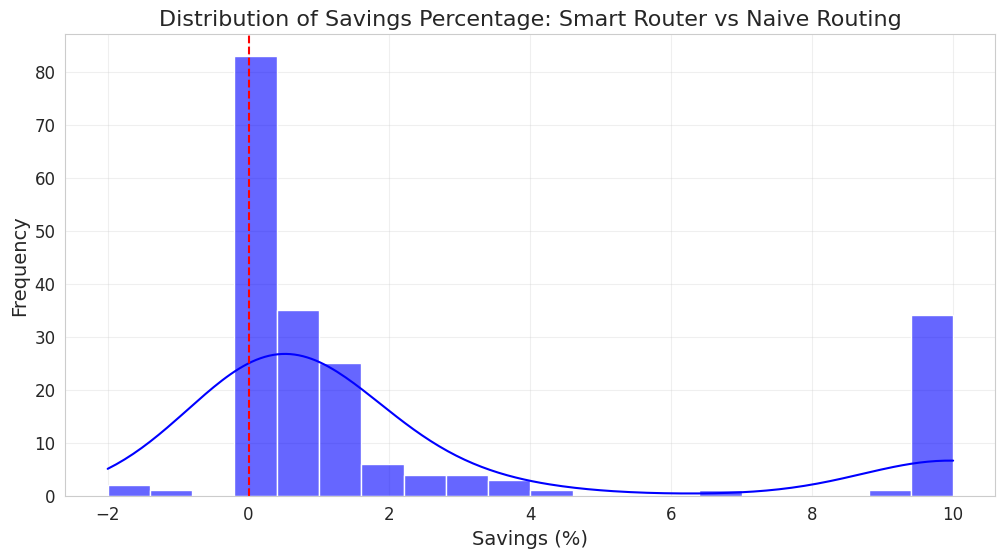

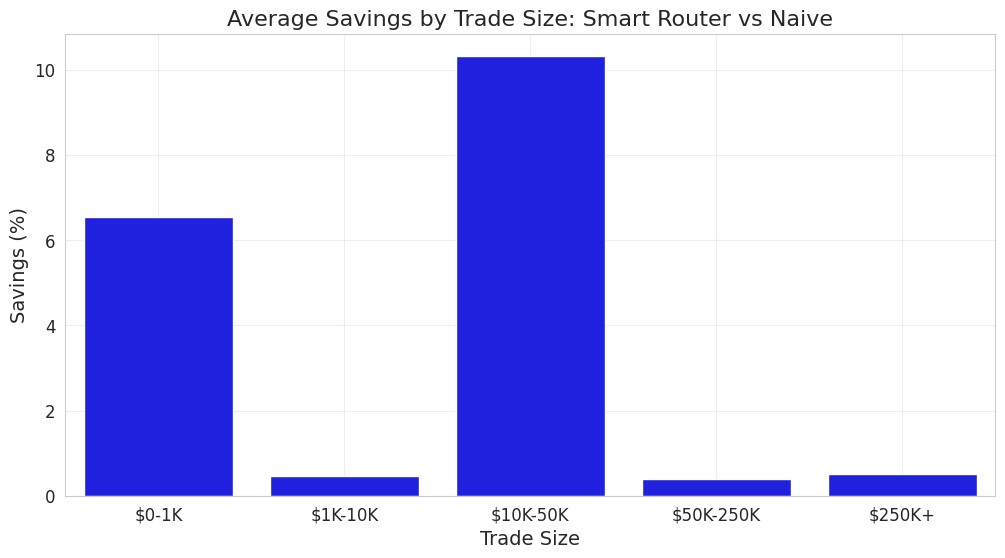

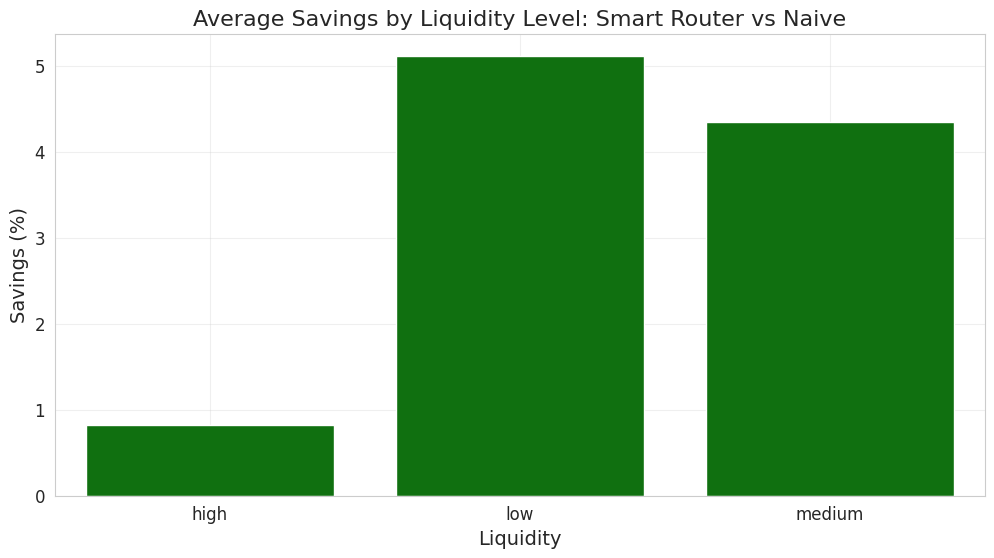

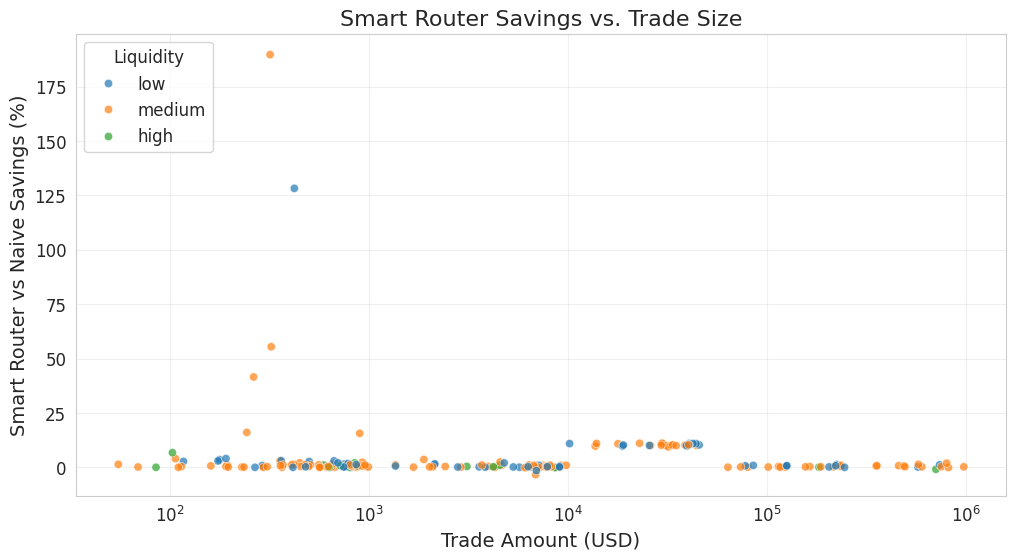

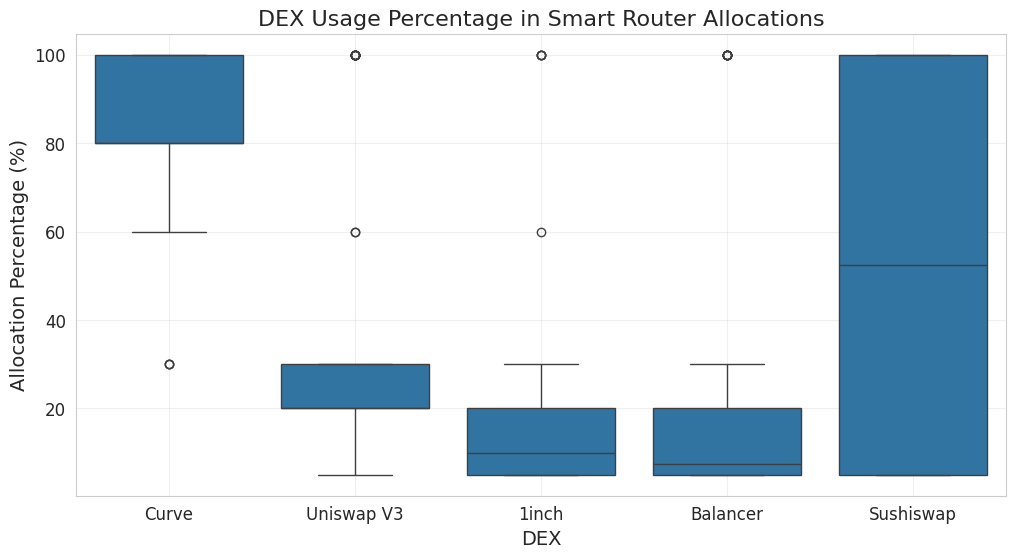

<ipython-input-11-8366e7810450>:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dollar_savings = df.groupby('size_category')['dollar_savings_vs_naive'].mean().reset_index()


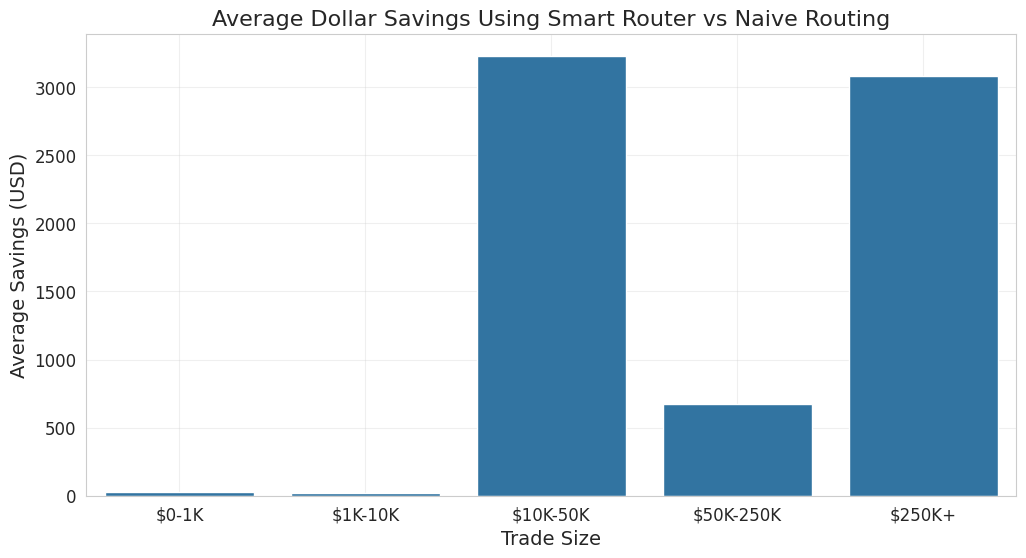

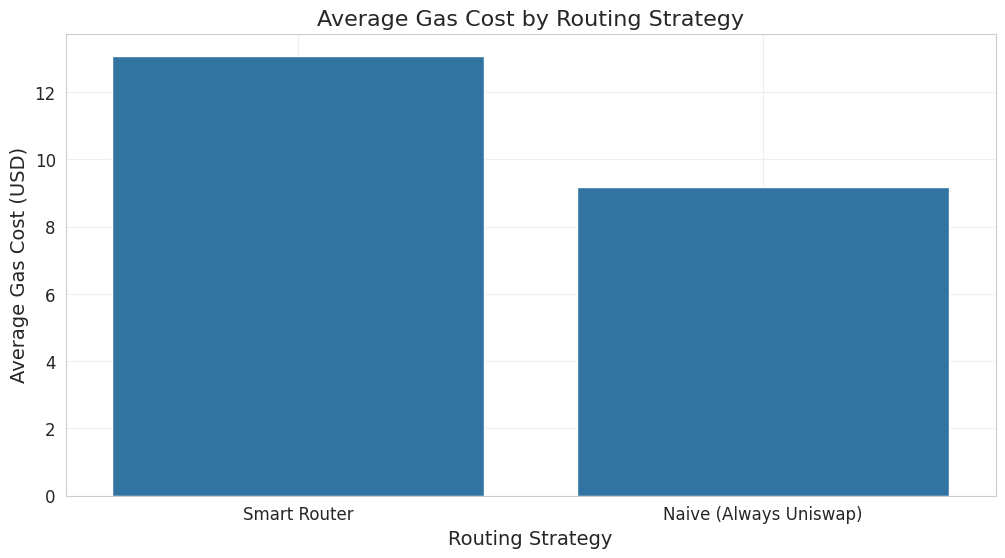


Break-even analysis:
Average price improvement: 4.3190% per dollar traded
Average additional gas cost for smart routing: $3.8892
Theoretical break-even trade amount: $90.05
Smart router provided better net returns in 90.0% of trades


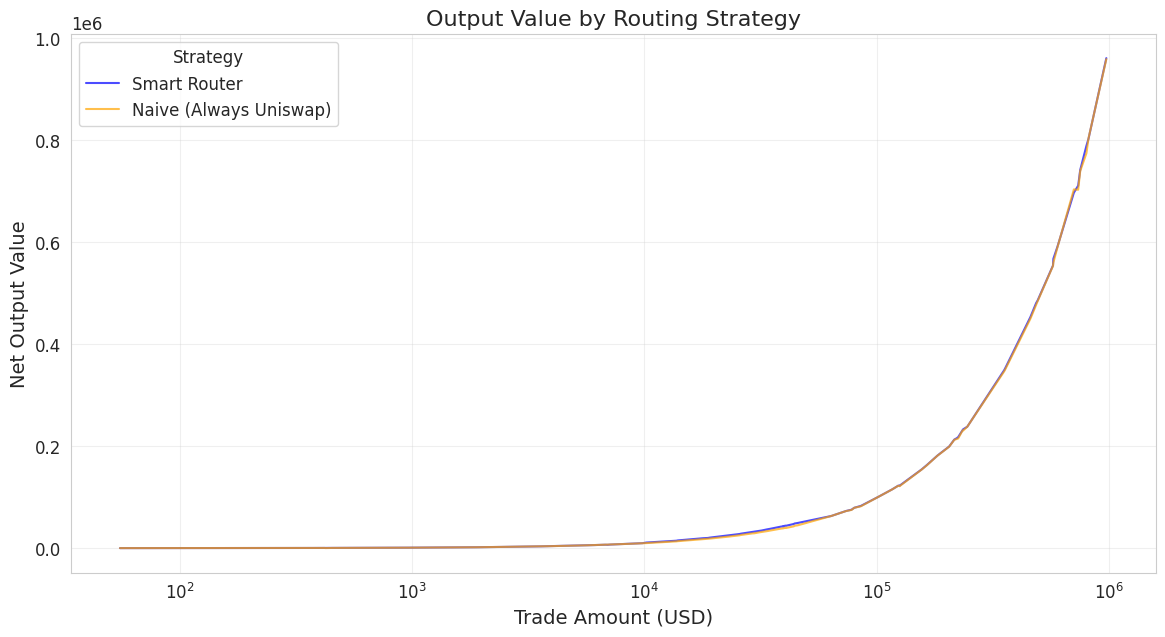

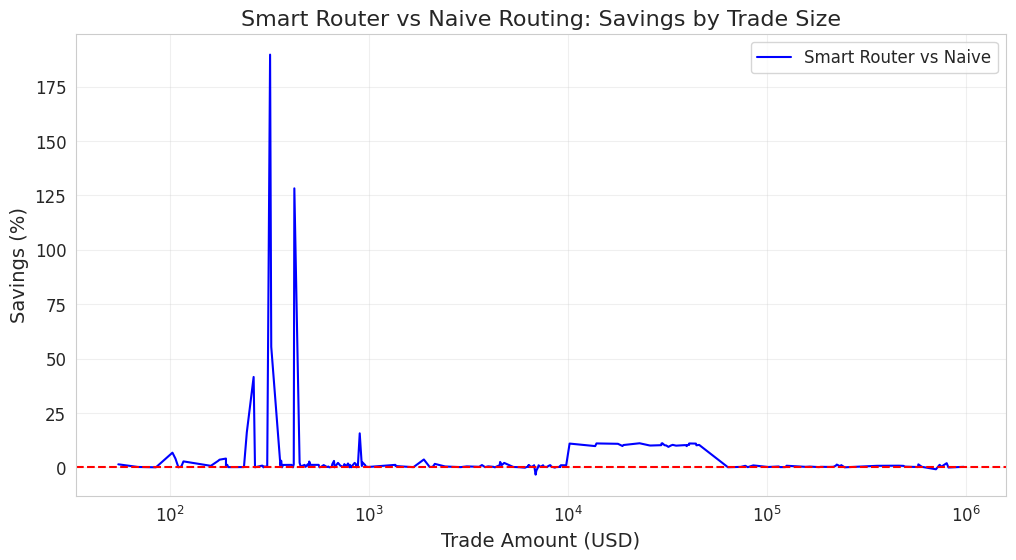


Total trading volume: $13,542,606.05
Total savings using smart router vs naive routing: $150,931.85 (1.114%)


<ipython-input-11-8366e7810450>:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'smart_router_avg_risk'] = risk_sum / weight_sum


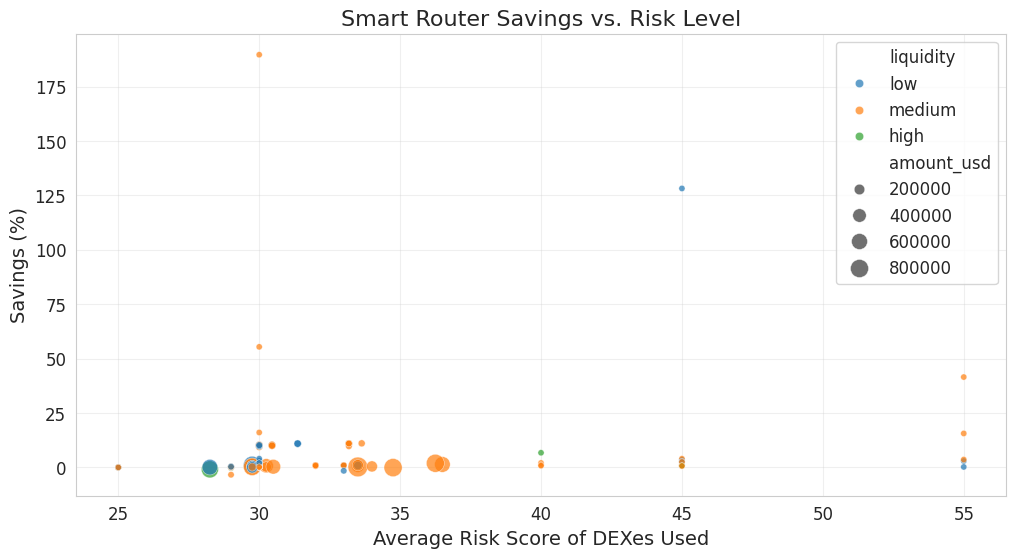


Analysis complete!


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate trades
num_trades = 200
df = generate_trade_data(num_trades)

# Display sample data
print("\nSample of generated trade data:")
print(df[['pair', 'amount_usd', 'liquidity', 'smart_vs_naive_pct']].head())

# Basic statistics
print("\nSummary statistics for routing savings:")
print(df['smart_vs_naive_pct'].describe())

# By trade size
size_bins = [0, 1000, 10000, 50000, 250000, float('inf')]
size_labels = ['$0-1K', '$1K-10K', '$10K-50K', '$50K-250K', '$250K+']
df['size_category'] = pd.cut(df['amount_usd'], bins=size_bins, labels=size_labels, right=False)

size_savings = df.groupby('size_category')[['smart_vs_naive_pct']].mean()
print("\nMean savings by trade size:")
print(size_savings)

# By liquidity
liquidity_savings = df.groupby('liquidity')[['smart_vs_naive_pct']].mean()
print("\nMean savings by liquidity:")
print(liquidity_savings)

# Figure 1: Distribution of savings percentage
plt.figure(figsize=(12, 6))
sns.histplot(df['smart_vs_naive_pct'].clip(-2, 10), bins=20, kde=True, color='blue', alpha=0.6)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Savings Percentage: Smart Router vs Naive Routing', fontsize=16)
plt.xlabel('Savings (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Figure 2: Savings by trade size
plt.figure(figsize=(12, 6))
sns.barplot(x=size_savings.index, y='smart_vs_naive_pct', data=size_savings.reset_index(), color='blue')
plt.title('Average Savings by Trade Size: Smart Router vs Naive', fontsize=16)
plt.xlabel('Trade Size', fontsize=14)
plt.ylabel('Savings (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Figure 3: Savings by liquidity
plt.figure(figsize=(12, 6))
sns.barplot(x=liquidity_savings.index, y='smart_vs_naive_pct', data=liquidity_savings.reset_index(), color='green')
plt.title('Average Savings by Liquidity Level: Smart Router vs Naive', fontsize=16)
plt.xlabel('Liquidity', fontsize=14)
plt.ylabel('Savings (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Figure 4: Scatterplot of savings vs amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='amount_usd', y='smart_vs_naive_pct', hue='liquidity', alpha=0.7, data=df)
plt.title('Smart Router Savings vs. Trade Size', fontsize=16)
plt.xlabel('Trade Amount (USD)', fontsize=14)
plt.ylabel('Smart Router vs Naive Savings (%)', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend(title='Liquidity', loc='upper left')
plt.show()

# Figure 5: DEX usage in smart router
dex_usage = []
for _, row in df.iterrows():
    routes = json.loads(row['smart_router_details'])
    for route in routes:
        dex_usage.append({
            'dex': route['dex'],
            'percentage': route['percentage'] * 100,
            'amount_usd': row['amount_usd'],
            'liquidity': row['liquidity']
        })

dex_usage_df = pd.DataFrame(dex_usage)

plt.figure(figsize=(12, 6))
sns.boxplot(x='dex', y='percentage', data=dex_usage_df)
plt.title('DEX Usage Percentage in Smart Router Allocations', fontsize=16)
plt.xlabel('DEX', fontsize=14)
plt.ylabel('Allocation Percentage (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Figure 6: Dollar value savings
df['dollar_savings_vs_naive'] = df['amount_usd'] * df['smart_vs_naive_pct'] / 100
dollar_savings = df.groupby('size_category')['dollar_savings_vs_naive'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='size_category', y='dollar_savings_vs_naive', data=dollar_savings)
plt.title('Average Dollar Savings Using Smart Router vs Naive Routing', fontsize=16)
plt.xlabel('Trade Size', fontsize=14)
plt.ylabel('Average Savings (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate average gas costs for each strategy
gas_impact = pd.DataFrame({
    'Route Type': ['Smart Router', 'Naive (Always Uniswap)'],
    'Avg Gas Cost (USD)': [
        df['smart_router_gas'].mean(),
        df['naive_gas'].mean()
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Route Type', y='Avg Gas Cost (USD)', data=gas_impact)
plt.title('Average Gas Cost by Routing Strategy', fontsize=16)
plt.xlabel('Routing Strategy', fontsize=14)
plt.ylabel('Average Gas Cost (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate the theoretical break-even point where gas costs equal price savings
avg_price_improvement_per_dollar = df['smart_vs_naive_pct'].mean() / 100
avg_gas_diff = df['smart_router_gas'].mean() - df['naive_gas'].mean()

# Calculate theoretical break-even amount
if avg_price_improvement_per_dollar > 0:
    break_even_amount = avg_gas_diff / avg_price_improvement_per_dollar
else:
    break_even_amount = float('inf')

print(f"\nBreak-even analysis:")
print(f"Average price improvement: {avg_price_improvement_per_dollar*100:.4f}% per dollar traded")
print(f"Average additional gas cost for smart routing: ${avg_gas_diff:.4f}")
print(f"Theoretical break-even trade amount: ${break_even_amount:.2f}")

# Calculate percentage of trades where smart router is better
smart_router_wins = (df['smart_router_net'] > df['naive_net']).mean() * 100
print(f"Smart router provided better net returns in {smart_router_wins:.1f}% of trades")

# Figure 7: Compare routing strategies
plt.figure(figsize=(14, 7))
for i, (col, label, color) in enumerate([
    ('smart_router_net', 'Smart Router', 'blue'),
    ('naive_net', 'Naive (Always Uniswap)', 'orange')
]):
    # Sort by amount to show trend
    sorted_df = df.sort_values('amount_usd')

    # Plot the net output value for this strategy
    plt.plot(sorted_df['amount_usd'], sorted_df[col],
             label=label, color=color, alpha=0.7)

plt.title('Output Value by Routing Strategy', fontsize=16)
plt.xlabel('Trade Amount (USD)', fontsize=14)
plt.ylabel('Net Output Value', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend(title='Strategy', loc='upper left')
plt.show()

# Figure 8: Net savings percentage over trade size
plt.figure(figsize=(12, 6))
sns.lineplot(x='amount_usd', y='smart_vs_naive_pct', data=df.sort_values('amount_usd'),
             label='Smart Router vs Naive', color='blue')

plt.axhline(y=0, color='r', linestyle='--')
plt.title('Smart Router vs Naive Routing: Savings by Trade Size', fontsize=16)
plt.xlabel('Trade Amount (USD)', fontsize=14)
plt.ylabel('Savings (%)', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Calculate total trading volume and savings
total_volume = df['amount_usd'].sum()
total_savings_vs_naive = (df['smart_router_net'] - df['naive_net']).sum()
pct_savings_vs_naive = (total_savings_vs_naive / total_volume) * 100

print(f"\nTotal trading volume: ${total_volume:,.2f}")
print(f"Total savings using smart router vs naive routing: ${total_savings_vs_naive:,.2f} ({pct_savings_vs_naive:.3f}%)")

# For each trade, calculate the average risk score of the DEXes used in the smart router
df['smart_router_avg_risk'] = 0
for i, row in df.iterrows():
    routes = json.loads(row['smart_router_details'])
    risk_sum = 0
    weight_sum = 0

    for route in routes:
        dex_name = route['dex']
        dex_weight = route['percentage']
        dex_risk = dexes[dex_name]['risk_score']

        risk_sum += dex_risk * dex_weight
        weight_sum += dex_weight

    if weight_sum > 0:
        df.at[i, 'smart_router_avg_risk'] = risk_sum / weight_sum

# Figure 9: Risk vs savings scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='smart_router_avg_risk', y='smart_vs_naive_pct',
                hue='liquidity', size='amount_usd', sizes=(20, 200), alpha=0.7, data=df)
plt.title('Smart Router Savings vs. Risk Level', fontsize=16)
plt.xlabel('Average Risk Score of DEXes Used', fontsize=14)
plt.ylabel('Savings (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("\nAnalysis complete!")